In [97]:
res = catalog.load('test_results')

2022-06-07 21:55:55,609 - kedro.io.data_catalog - INFO - Loading data from `test_results` (CSVDataSet)...


In [98]:
res.head()

,2204,2203,2202,2201,2200,2199,2198,2197,2196,2195,...,10,9,8,7,6,5,4,3,2,1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500,0.500,0.490,0.480,0.470,0.470,0.460,0.410,0.410,0.310
1,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,...,0.980,0.978,0.977,0.975,0.973,0.965,0.957,0.948,0.932,0.872
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.210,0.210,0.210,0.200,0.200,0.190,0.190,0.170,0.140,0.070
3,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,...,0.498,0.491,0.478,0.464,0.453,0.433,0.414,0.389,0.373,0.359


In [99]:
# reverse column order and drop labels
dataset = res['dataset'].tolist()
_res = res[res.columns[::-1]].drop(columns=['dataset'])
dataset

['keyword:ecu_test_doku',
 'keyword:germanquad',
 'semantic:ecu_test_doku',
 'semantic:germanquad']

In [100]:
# replace nas
_res = _res.fillna(0)
_res.head(5)

,1,2,3,4,5,6,7,8,9,10,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
0,0.310,0.410,0.410,0.460,0.470,0.470,0.480,0.490,0.500,0.500,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.872,0.932,0.948,0.957,0.965,0.973,0.975,0.977,0.978,0.980,...,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
2,0.070,0.140,0.170,0.190,0.190,0.200,0.200,0.210,0.210,0.210,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.359,0.373,0.389,0.414,0.433,0.453,0.464,0.478,0.491,0.498,...,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714


In [101]:
# transpose
_res = _res.transpose()

In [102]:
# label columns
_res.columns = dataset
_res.head()

,keyword:ecu_test_doku,keyword:germanquad,semantic:ecu_test_doku,semantic:germanquad
1,0.31,0.872,0.07,0.359
2,0.41,0.932,0.14,0.373
3,0.41,0.948,0.17,0.389
4,0.46,0.957,0.19,0.414
5,0.47,0.965,0.19,0.433


<AxesSubplot:>

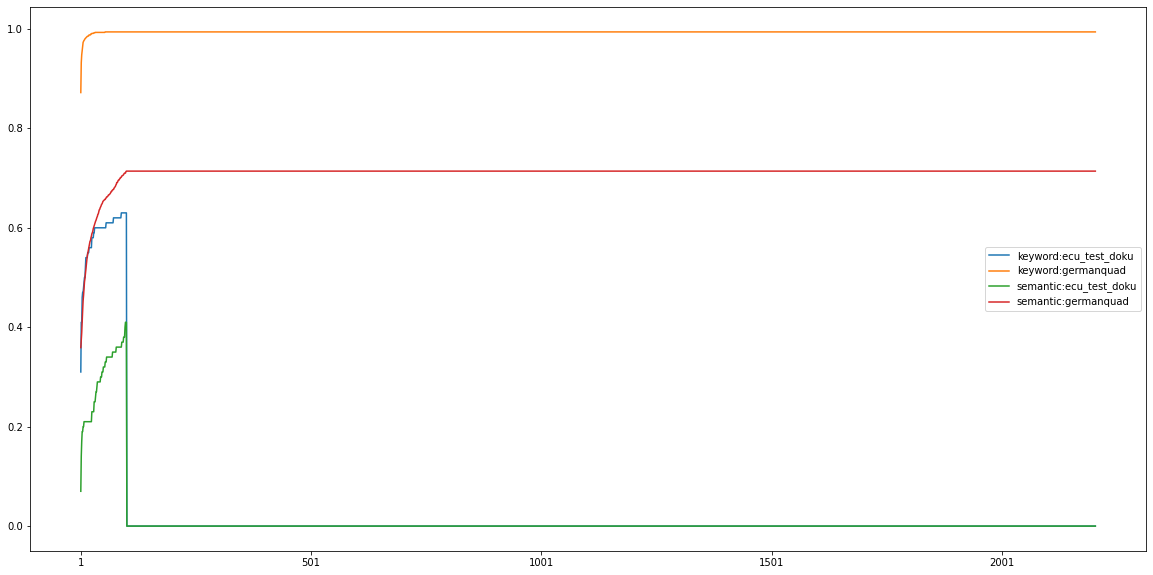

In [107]:
_res.plot(figsize=(20, 10))

<AxesSubplot:>

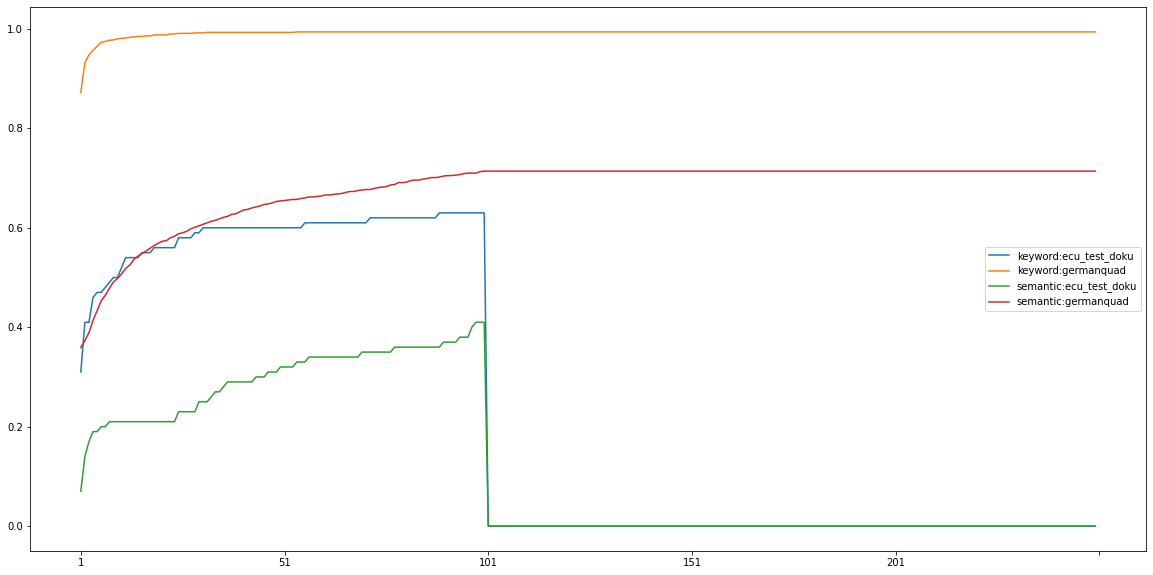

In [109]:
_res[:250].plot(figsize=(20, 10))